## Problem

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

### 1. Read the data as an appropriate Time Series data and plot the data.

In [5]:
df = pd.read_csv('Rose.csv')
df.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [6]:
df.dtypes

YearMonth     object
Rose         float64
dtype: object

In [7]:
df = pd.read_csv('Rose.csv', parse_dates = ['YearMonth'])

In [8]:
df.dtypes

YearMonth    datetime64[ns]
Rose                float64
dtype: object

In [9]:
df = pd.read_csv('Rose.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')

In [10]:
df.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [11]:
df.tail()

,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


#### Plot the Time Series to understand the behaviour of the data.¶

In [12]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

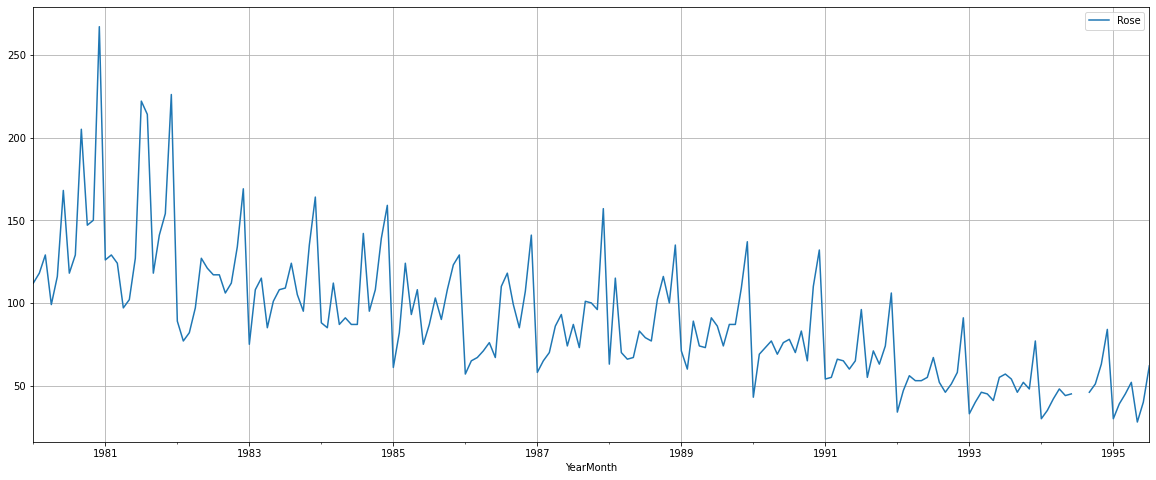

In [13]:
df.plot()
plt.grid();

We can see that there is a slight downward trend with a seasonal pattern associated as well.

### 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

#### Check the basic measures of descriptive statistics

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [15]:
df.shape

(187, 1)

In [16]:
df.isnull().sum()

Rose    2
dtype: int64

In [17]:
#Finding the mean of the column having NaN
mean_value=df['Rose'].mean()
df['Rose'].fillna(value=mean_value, inplace=True)

In [18]:
df.isnull().sum()

Rose    0
dtype: int64

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rose,187.0,90.394595,38.964155,28.0,63.0,86.0,111.0,267.0


The basic measures of descriptive statistics tell us how the Sales have varied across years. But remember, for this measure of descriptive statistics we have averaged over the whole data without taking the time component into account.

#### Plot a boxplot to understand the spread of Rose wine sales across different years and within different months across years
#### Yearly Plot

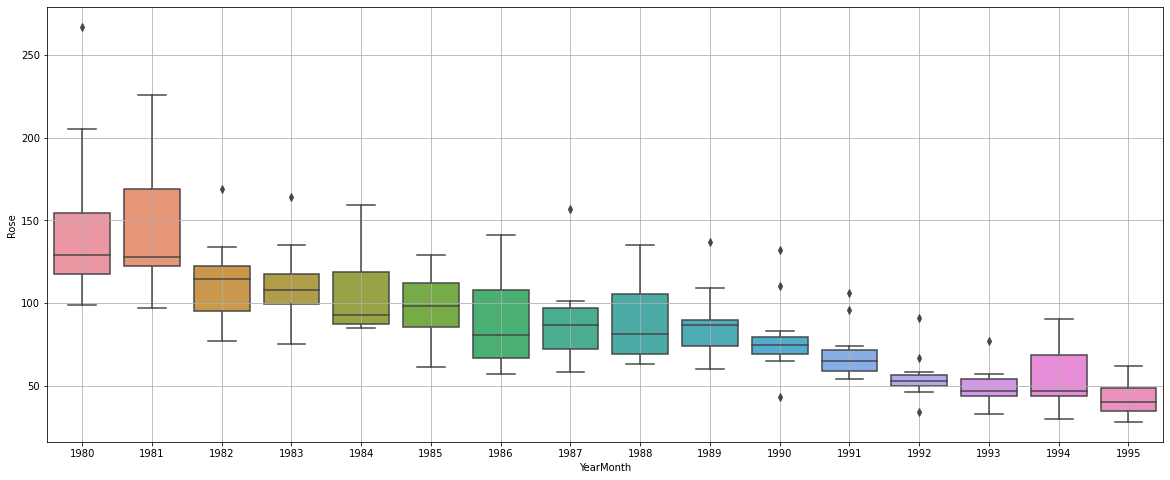

In [20]:
sns.boxplot(x = df.index.year,y = df['Rose'])
plt.grid();

The yearly boxplots also shows that the Sales have decreased towards the last few years.

#### Monthly Plot

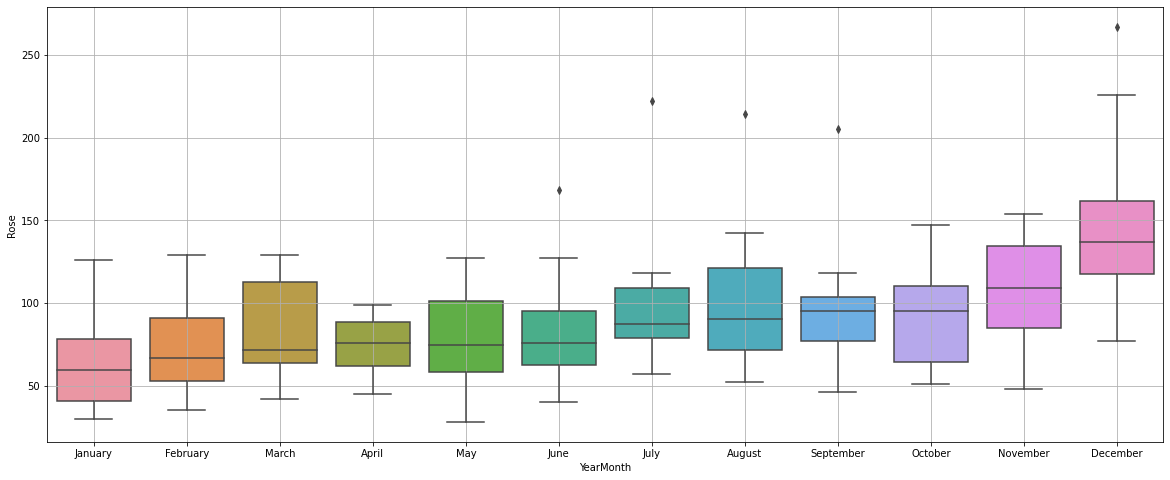

In [21]:
sns.boxplot(x = df.index.month_name(),y = df['Rose'])
plt.grid();

There is a clear distinction of 'Rose Sales' within different months spread across various years. The highest such numbers are being recorded in the month of December across various years.

In [22]:
from statsmodels.graphics.tsaplots import month_plot

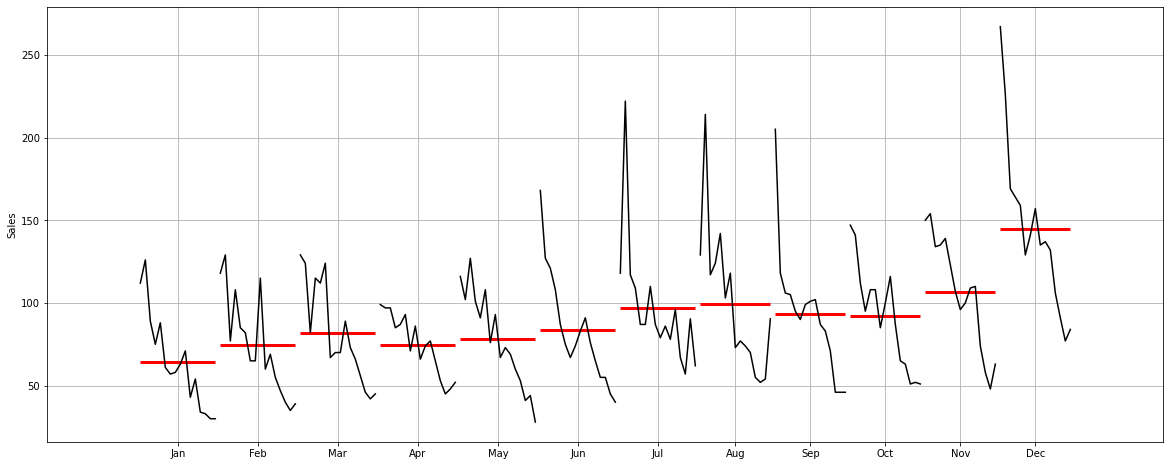

In [23]:
month_plot(df['Rose'],ylabel='Sales')
plt.grid();

This plot shows us the behaviour of the Time Series (Sales of Rose wine) across various months. The red line is the median value.

Text(0.5, 1.0, 'Rose sales')

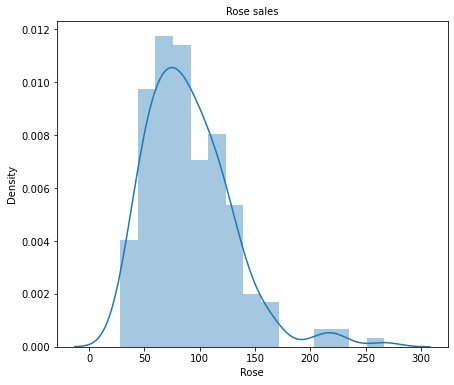

In [24]:
plt.figure(figsize=(7,6))
a = sns.distplot(df['Rose'])
a.set_title("Rose sales",fontsize=10)

From the above histogram, we can infer that the graph is right skewed.

Text(0.5, 1.0, 'Rose sales')

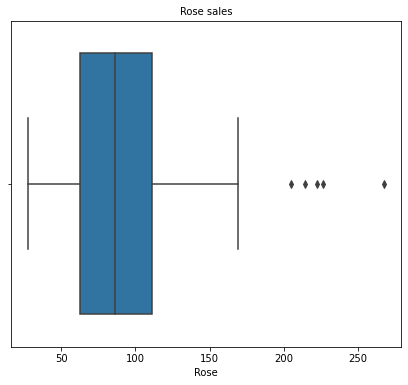

In [25]:
plt.figure(figsize=(7,6))
a = sns.boxplot(df['Rose'] , orient = "v")
a.set_title("Rose sales",fontsize=10)

From the above boxplot, we can see that there aren't much of outliers present in the data and the sales count ranges between 25 to 170.

In [26]:
df.skew(axis = 0, skipna = True)

Rose    1.273183
dtype: float64

Since the skewness value is greater than 1, it is right skewed.

#### Plot a graph of monthly RetailSales across years.

In [27]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month, index = df.index.year)
monthly_sales_across_years.head()

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.0,129.0,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.0,214.0,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.0,117.0,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.0,124.0,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.0,142.0,95.0,108.0,139.0,159.0


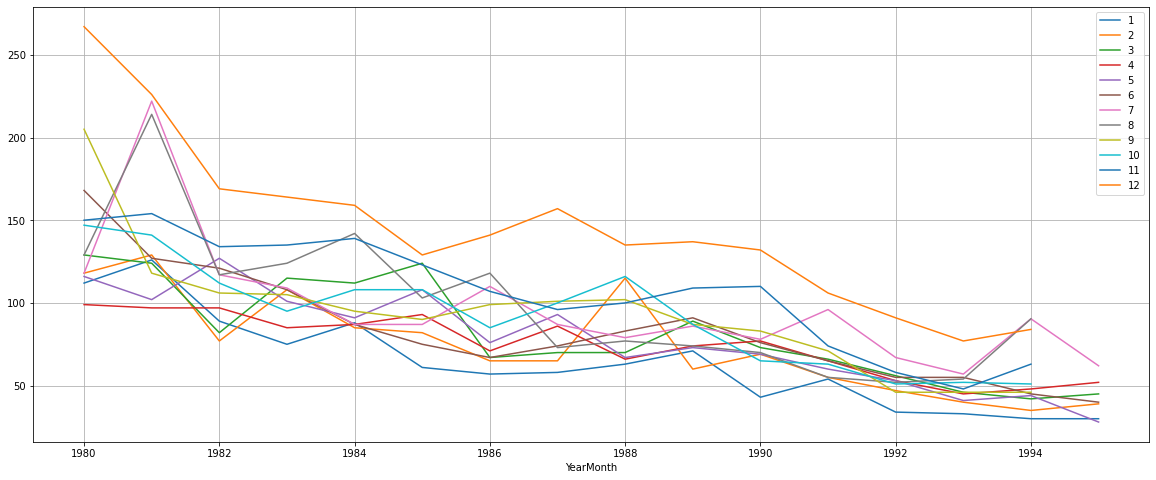

In [28]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

#### Plot the Empirical Cumulative Distribution.

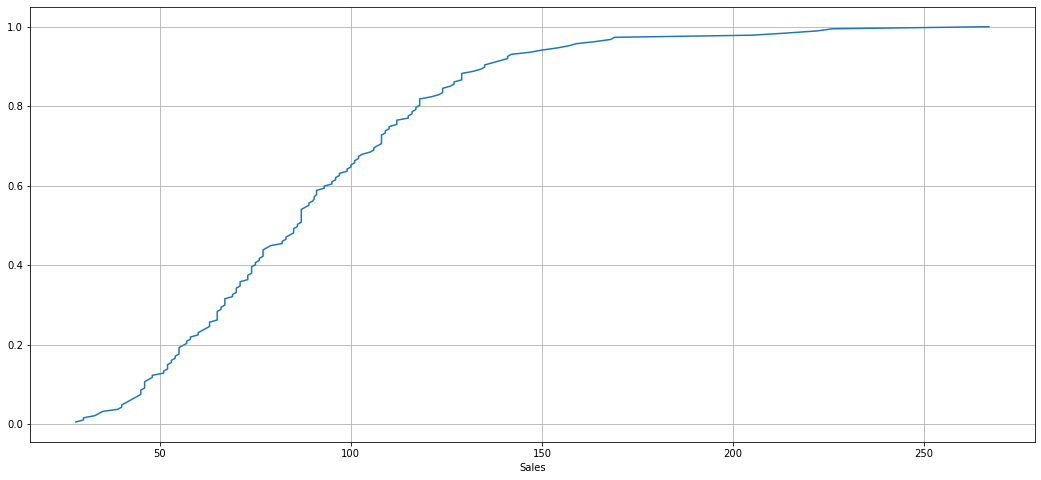

In [29]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

This particular graph tells us what percentage of data points refer to what number of Sales.

#### Plot the average RetailSales per month and the month on month percentage change of RetailSales.

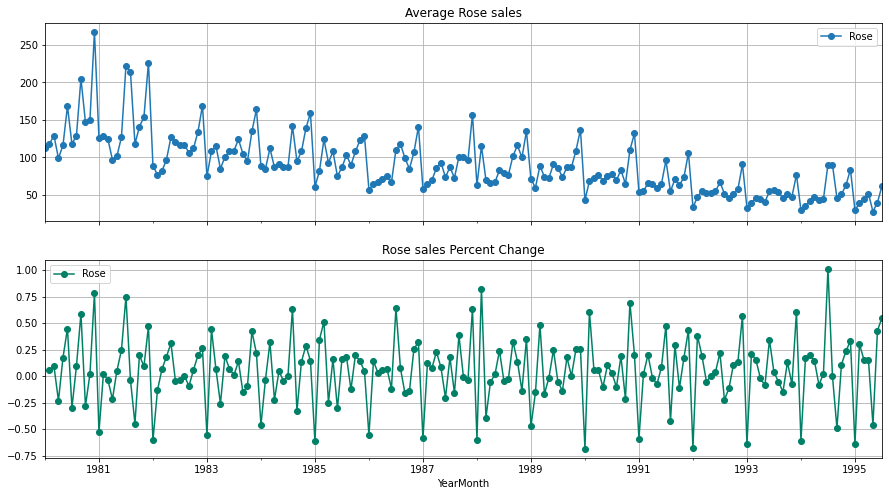

In [30]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["Rose"].mean()
pct_change = df.groupby(df.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rose sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())

# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Rose sales Percent Change",grid=True)

The above two graphs tells us the Average 'RetailSales' and the Percentage change of 'RetailSales' with respect to the time.

#### Decompose the Time Series and plot the different components.

In [31]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

#### Additive Decomposition

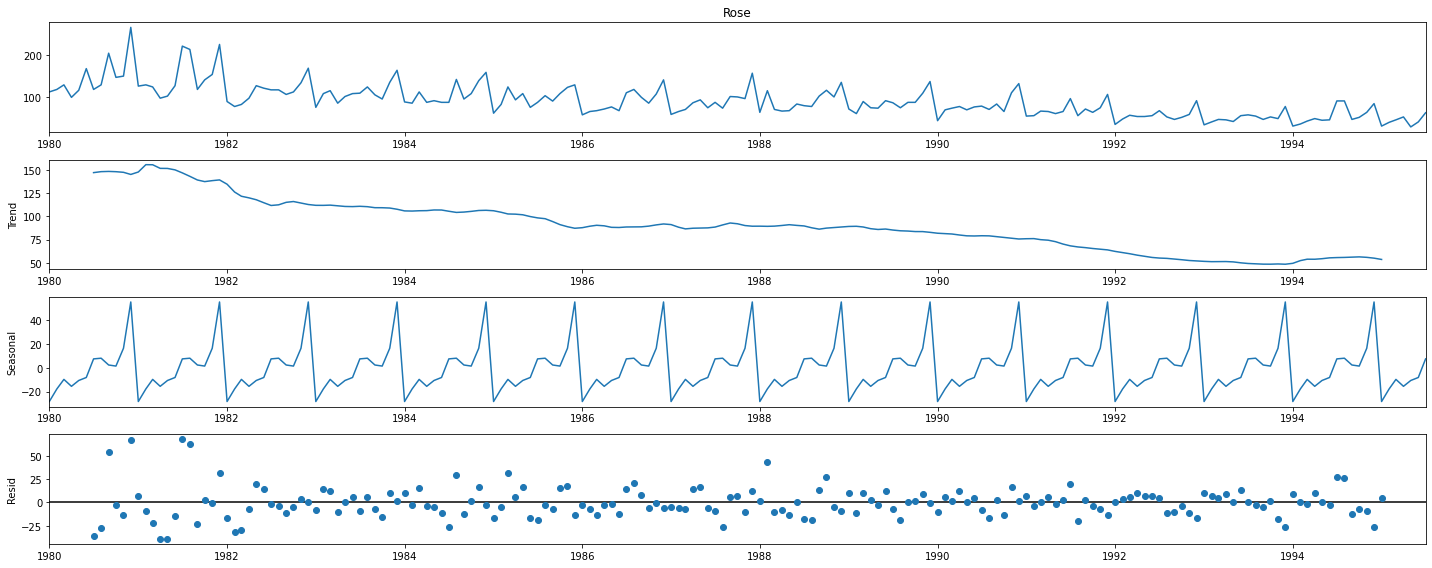

In [32]:
decomposition = seasonal_decompose(df['Rose'],model='additive')
decomposition.plot();

We see that the residuals are located around 0 from the plot of the residuals in the decomposition.

In [33]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(8),'\n')
print('Seasonality','\n',seasonality.head(8),'\n')
print('Residual','\n',residual.head(8),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -28.403723
1980-02-01   -17.833219
1980-03-01    -9.816537
1980-04-01   -15.629037
1980-05-01   -10.727251
1980-06-01    -8.209394
1980-07-01     7.405916
1980-08-01     7.986472
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -36.489250
1980-08-01   -27.111472
Name: resid, dtype: float64 



In [34]:
#Let us check with the additive model formula

147.083333 + 7.405916 -36.489250

117.999999

#### Multiplicative Decomposition

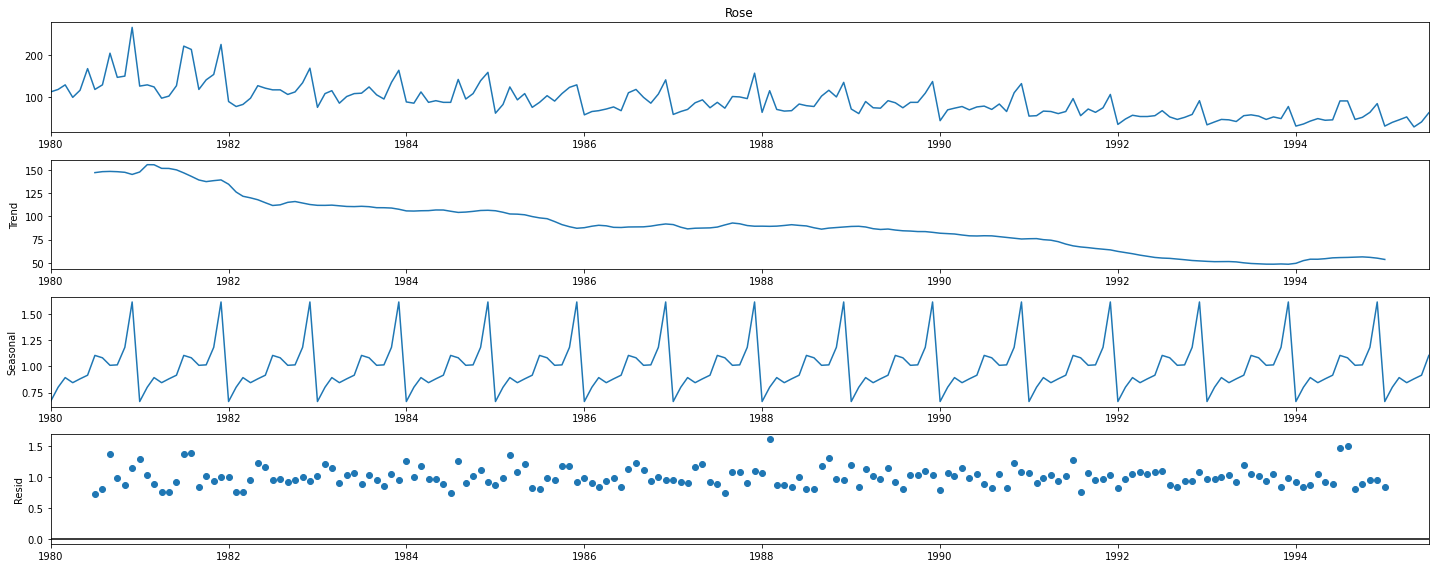

In [35]:
decomposition = seasonal_decompose(df['Rose'],model='multiplicative')
decomposition.plot();

For the multiplicative series, we see that a lot of residuals are located around 1.

Since both the trend and seasonality are the same from the above plots of decomposition, we can infere that the time series model is additive.

In [36]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(8),'\n')
print('Seasonality','\n',seasonality.head(8),'\n')
print('Residual','\n',residual.head(8),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.664388
1980-02-01    0.800694
1980-03-01    0.892495
1980-04-01    0.844044
1980-05-01    0.880516
1980-06-01    0.915220
1980-07-01    1.103899
1980-08-01    1.081169
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.726757
1980-08-01    0.805504
Name: resid, dtype: float64 



In [37]:
# Let us check with the muliplicative model formula

147.083333 * 1.103899 * 0.726757

118.00000511452747

We can observe that both the values are same. Hence, it is a additive model.

### 3. Split the data into training and test. The test data should start in 1991.

In [38]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [39]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [40]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


Last few rows of Training Data


,Rose
YearMonth,
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0


First few rows of Test Data


,Rose
YearMonth,
1991-01-01,54.0
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0


Last few rows of Test Data


,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


In [41]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


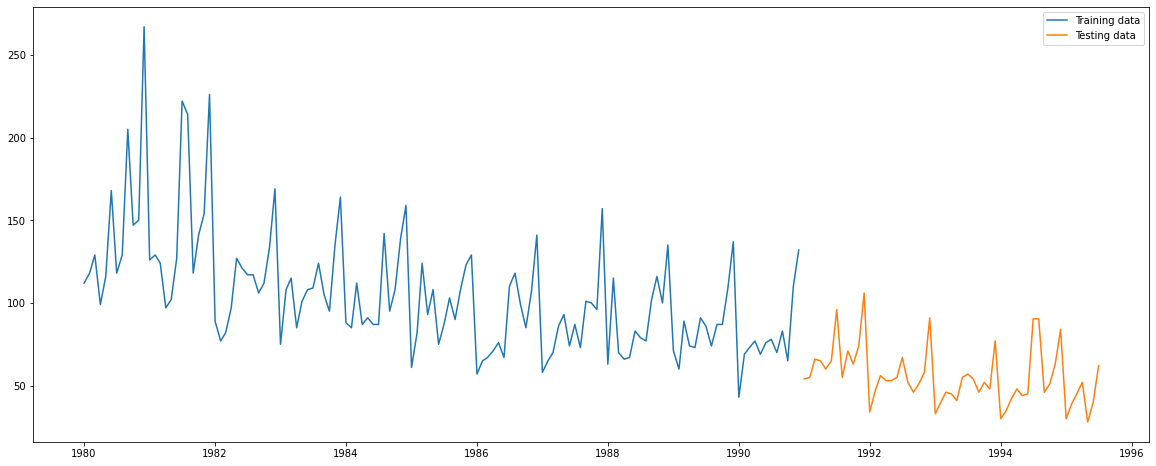

In [42]:
plt.plot(train, label = 'Training data')
plt.plot(test, label = 'Testing data')
plt.plot()
plt.legend();

### 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

#### Model 1: Linear Regression
For this particular linear regression, we are going to regress the 'Rose' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [43]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [44]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [45]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data 
              Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132 

First few rows of Test Data 
             Rose  time
YearMonth             
1991-01-01  54.0    43
1991-02-01  55.0    44
1991-03-01  66.0    45
1991-04-01  65.0    46
1991-05-01  60.0    47 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-01  45.0    93
1995-04-01  52.0    94
1995-05-01  28.0    95
1995-06-01  40.0    96
1995-07-01  62.0    97 



Now that our training and test data has been modified, let us go ahead use 𝐿𝑖𝑛𝑒𝑎𝑟𝑅𝑒𝑔𝑟𝑒𝑠𝑠𝑖𝑜𝑛 to build the model on the training data and test the model on the test data.

In [46]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])

LinearRegression()

In [47]:
train_predictions_model1 = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

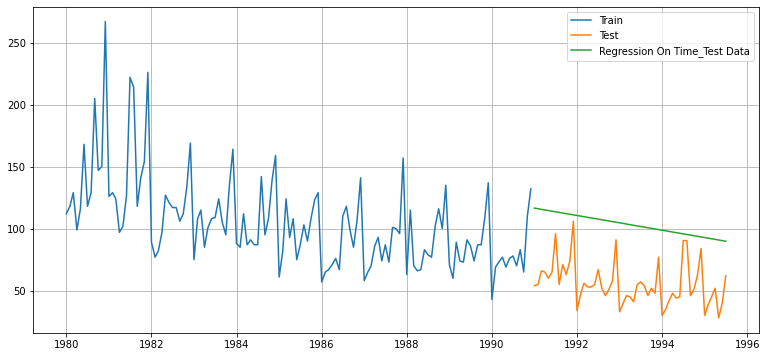

In [48]:
plt.figure(figsize=(13,6))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

#### Model Evaluation

In [49]:
from sklearn import metrics

In [50]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

For RegressionOnTime forecast on the Test Data,  RMSE is 50.550


,Test RMSE
RegressionOnTime,50.549673


#### Model 2: Naive Approach: 𝑦̂ 𝑡+1=𝑦𝑡
For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [51]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [52]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

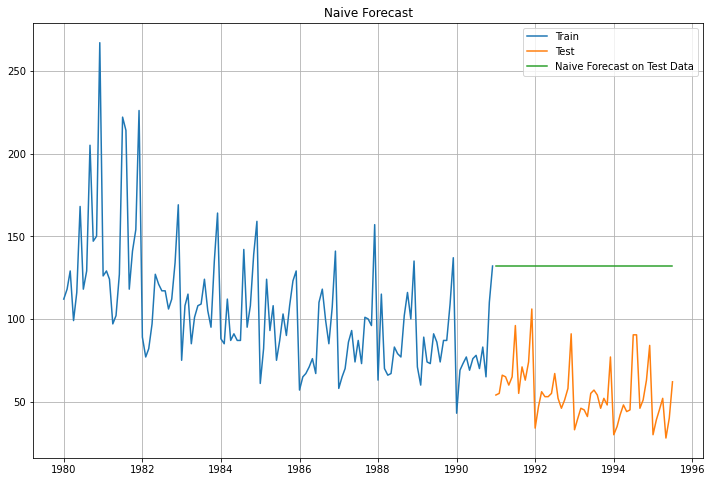

In [53]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

#### Model Evaluation

In [54]:
## Test Data - RMSE
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

For RegressionOnTime forecast on the Test Data,  RMSE is 78.396


,Test RMSE
RegressionOnTime,50.549673
NaiveModel,78.396083


#### Model 3: Simple Average
For this particular simple average method, we will forecast by using the average of the training values.

In [55]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [56]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
YearMonth,,
1991-01-01,54.0,104.939394
1991-02-01,55.0,104.939394
1991-03-01,66.0,104.939394
1991-04-01,65.0,104.939394
1991-05-01,60.0,104.939394


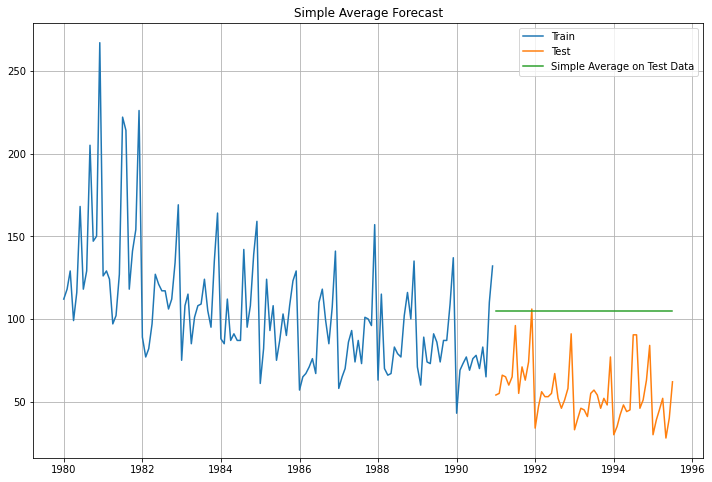

In [57]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

#### Model Evaluation

In [58]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

For Simple Average forecast on the Test Data,  RMSE is 52.319


,Test RMSE
RegressionOnTime,50.549673
NaiveModel,78.396083
SimpleAverageModel,52.318735


#### Model 4: Moving Average(MA)
For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

For Moving Average, we are going to average over the entire data.

In [59]:
MovingAverage = df.copy()
MovingAverage.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


#### Trailing moving averages

In [60]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN,NaN
1980-03-01,129.0,123.5,NaN,NaN,NaN
1980-04-01,99.0,114.0,114.5,NaN,NaN
1980-05-01,116.0,107.5,115.5,NaN,NaN


In [61]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:132] 
trailing_MovingAverage_test=MovingAverage[132:]

In [62]:
trailing_MovingAverage_train.shape

(132, 5)

In [63]:
trailing_MovingAverage_test.shape

(55, 5)

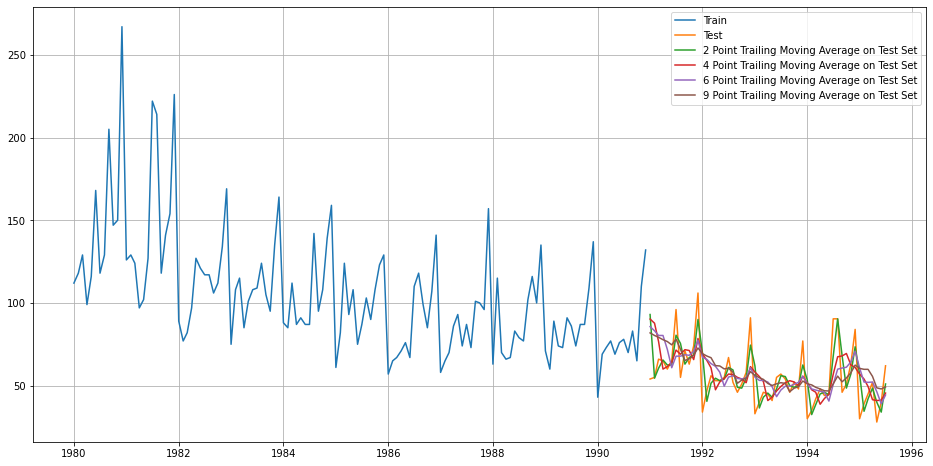

In [64]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [65]:
# Model Evaluation

## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 12.298
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 15.846
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 15.986
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 16.501


In [66]:
resultsDf4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf4])
resultsDf

,Test RMSE
RegressionOnTime,50.549673
NaiveModel,78.396083
SimpleAverageModel,52.318735
2pointTrailingMovingAverage,12.298291
4pointTrailingMovingAverage,15.845558
6pointTrailingMovingAverage,15.986163
9pointTrailingMovingAverage,16.500823


Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

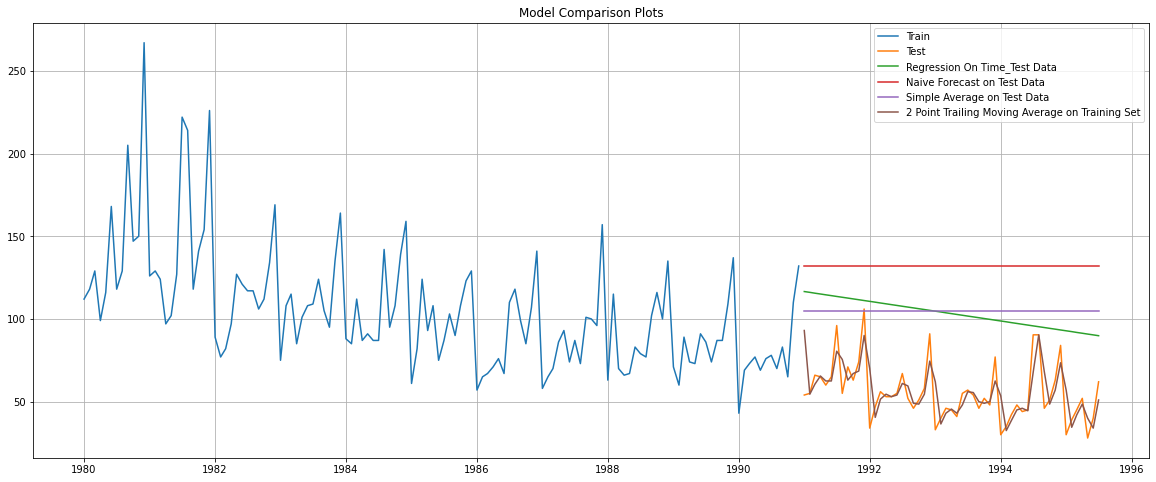

In [67]:
## Plotting on both Training and Test data

plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

#### Model 5: Simple Exponential Smoothing

In [68]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [69]:
SES_train = train.copy()
SES_test = test.copy()

In [70]:
model_SES = SimpleExpSmoothing(SES_train['Rose'],initialization_method='estimated')

In [71]:
model_SES_autofit = model_SES.fit(optimized=True)

In [72]:
model_SES_autofit.params

{'smoothing_level': 0.09874920899865502,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.3871074301239,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [73]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Rose,predict
YearMonth,,
1991-01-01,54.0,87.10498
1991-02-01,55.0,87.10498
1991-03-01,66.0,87.10498
1991-04-01,65.0,87.10498
1991-05-01,60.0,87.10498


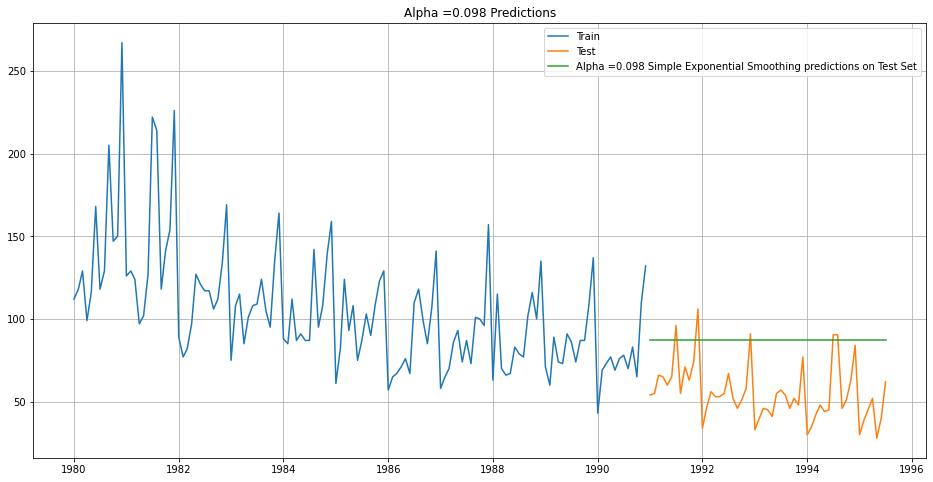

In [74]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.098 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.098 Predictions');

#### Model Evaluation for  𝛼  = 0.098 : Simple Exponential Smoothing

In [75]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha = 0.098 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha = 0.098 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 35.936


In [76]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.098,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,50.549673
NaiveModel,78.396083
SimpleAverageModel,52.318735
2pointTrailingMovingAverage,12.298291
4pointTrailingMovingAverage,15.845558
6pointTrailingMovingAverage,15.986163
9pointTrailingMovingAverage,16.500823
"Alpha=0.098,SimpleExponentialSmoothing",35.936195


#### Model 6: Double Exponential Smoothing (Holt's Model)

Two parameters  𝛼  and  𝛽  are estimated in this model. Level and Trend are accounted for in this model.

In [77]:
DES_train = train.copy()
DES_test = test.copy()

In [78]:
model_DES = Holt(DES_train['Rose'], initialization_method='estimated')
model_DES = model_DES.fit(optimized=True)
model_DES.params

{'smoothing_level': 1.4901161193847656e-08,
 'smoothing_trend': 5.448169774560283e-09,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 137.81762949544608,
 'initial_trend': -0.4943507283995123,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [79]:
DES_test['predict'] = model_DES.forecast(steps=len(test))
DES_test.head()

,Rose,predict
YearMonth,,
1991-01-01,54.0,72.068983
1991-02-01,55.0,71.574632
1991-03-01,66.0,71.080281
1991-04-01,65.0,70.585930
1991-05-01,60.0,70.091580


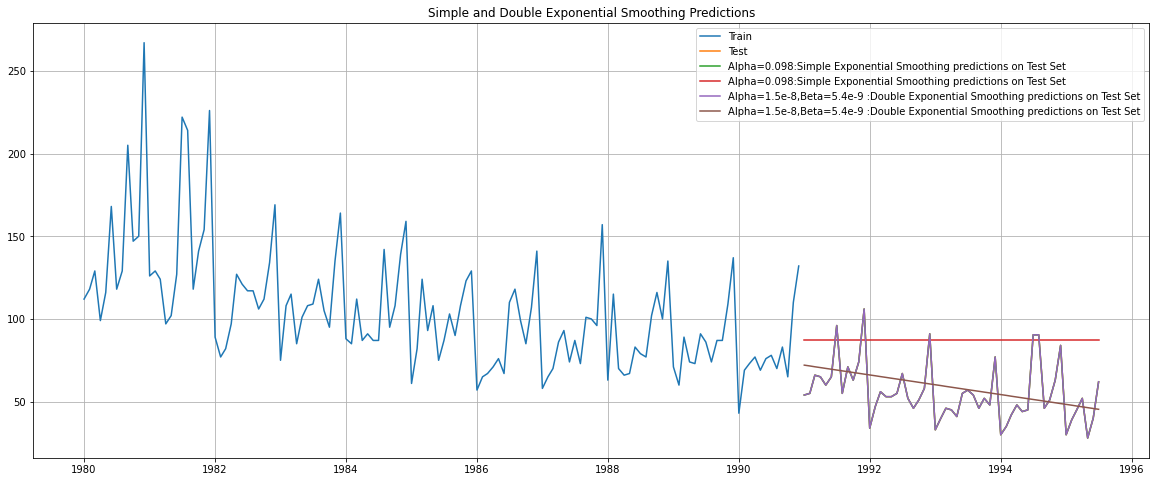

In [80]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_test, label='Alpha=0.098:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_test, label='Alpha=1.5e-8,Beta=5.4e-9 :Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

#### Model Evaluation for 𝛼 = 1.5e-8 : Double Exponential Smoothing

In [81]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict'],squared=False)
print("For Alpha = 1.5e-8,Beta=5.4e-9 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha = 1.5e-8,Beta=5.4e-9 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 16.981


In [82]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]},index=['Alpha=1.5e-8,Beta=5.4e-9,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

,Test RMSE
RegressionOnTime,50.549673
NaiveModel,78.396083
SimpleAverageModel,52.318735
2pointTrailingMovingAverage,12.298291
4pointTrailingMovingAverage,15.845558
6pointTrailingMovingAverage,15.986163
9pointTrailingMovingAverage,16.500823
"Alpha=0.098,SimpleExponentialSmoothing",35.936195
"Alpha=1.5e-8,Beta=5.4e-9,DoubleExponentialSmoothing",16.980564


#### Model 7: Triple Exponential Smoothing (Holt - Winter's Model) - A, A, A

Three parameters 𝛼 , 𝛽 and 𝛾 are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [83]:
TES_train = train.copy()
TES_test = test.copy()

In [84]:
# Initializing the Triple Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit(optimized=True)
model_TES.params

{'smoothing_level': 0.08491574907842013,
 'smoothing_trend': 5.5205494088745035e-06,
 'smoothing_seasonal': 0.0005477182208247348,
 'damping_trend': nan,
 'initial_level': 147.05898703809248,
 'initial_trend': -0.5496981430927392,
 'initial_seasons': array([-31.16021285, -18.81317648, -10.81406896, -21.41413199,
        -12.6036696 ,  -7.23553106,   2.76744902,   8.85548059,
          4.83969803,   2.95125217,  21.07934859,  63.31472515]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [85]:
# Forecasting using this model for the duration of the test set
TES_test['predict'] = model_TES.forecast(steps=len(test))
TES_test.head()

,Rose,predict
YearMonth,,
1991-01-01,54.0,42.574560
1991-02-01,55.0,54.372099
1991-03-01,66.0,61.821511
1991-04-01,65.0,50.671639
1991-05-01,60.0,58.932400


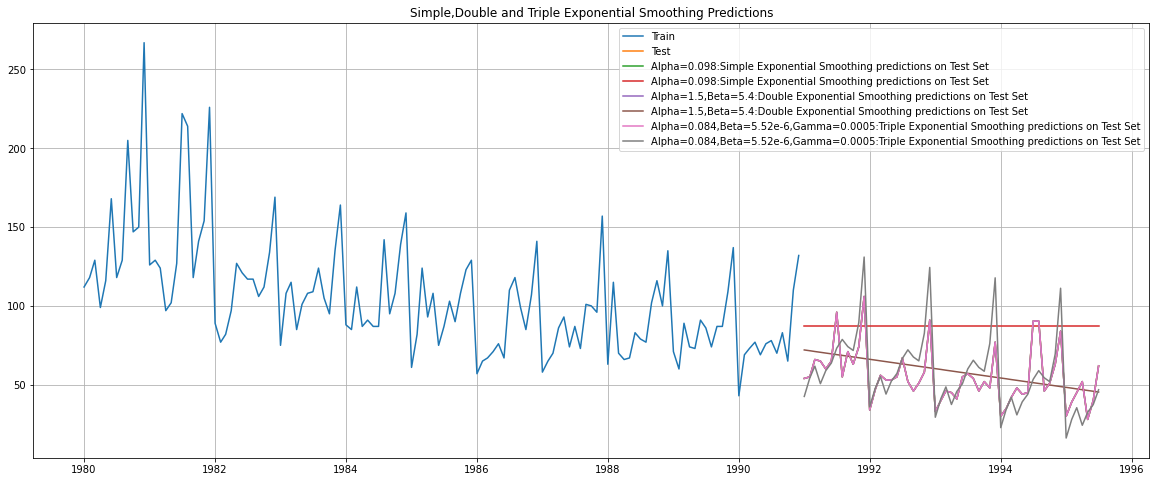

In [86]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_test, label='Alpha=0.098:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_test, label='Alpha=1.5,Beta=5.4:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_test, label='Alpha=0.084,Beta=5.52e-6,Gamma=0.0005:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

#### Model Evaluation for 𝛼 = 0.084, 𝛽 = 5.52e-6 and 𝛾 = 0.0005 : Triple Exponential Smoothing (A,A,A)

In [87]:
## Test Data

rmse_model7_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict'],squared=False)
print("For Alpha=0.084,Beta=5.52e-6,Gamma=0.0005 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model7_test_1))

For Alpha=0.084,Beta=5.52e-6,Gamma=0.0005 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is 15.534


In [88]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse_model7_test_1]},index=['Alpha=0.084,Beta=5.52e-6,Gamma=0.0005, Triple ExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

,Test RMSE
RegressionOnTime,50.549673
NaiveModel,78.396083
SimpleAverageModel,52.318735
2pointTrailingMovingAverage,12.298291
4pointTrailingMovingAverage,15.845558
6pointTrailingMovingAverage,15.986163
9pointTrailingMovingAverage,16.500823
"Alpha=0.098,SimpleExponentialSmoothing",35.936195
"Alpha=1.5e-8,Beta=5.4e-9,DoubleExponentialSmoothing",16.980564
"Alpha=0.084,Beta=5.52e-6,Gamma=0.0005, Triple ExponentialSmoothing",15.534165


#### Model 8 : Holt-Winters - ETS(A, A, M) - Holt Winter's linear method

In [89]:
TES_train_am = train.copy()
TES_test_am = test.copy()

In [90]:
# Initializing the Triple Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='additive',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit(optimized=True)
model_TES_am.params

{'smoothing_level': 0.07736040004765096,
 'smoothing_trend': 0.03936496779735522,
 'smoothing_seasonal': 0.0008375039104357999,
 'damping_trend': nan,
 'initial_level': 156.90674503596637,
 'initial_trend': -0.9061396720042346,
 'initial_seasons': array([0.7142168 , 0.80982439, 0.88543128, 0.77363782, 0.87046319,
        0.94699283, 1.04196135, 1.11012703, 1.04835489, 1.0276963 ,
        1.19783562, 1.6514144 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [91]:
# Forecasting using this model for the duration of the test set
TES_test_am['predict'] = model_TES_am.forecast(steps=len(test))
TES_test_am.head()

,Rose,predict
YearMonth,,
1991-01-01,54.0,55.942246
1991-02-01,55.0,63.240624
1991-03-01,66.0,68.899674
1991-04-01,65.0,60.007486
1991-05-01,60.0,67.257150


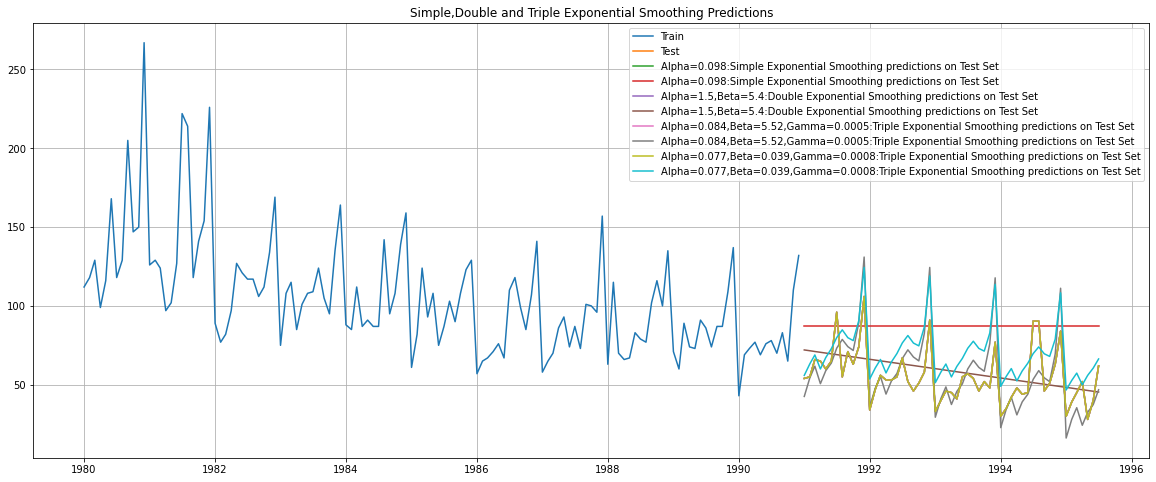

In [92]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_test, label='Alpha=0.098:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_test, label='Alpha=1.5,Beta=5.4:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_test, label='Alpha=0.084,Beta=5.52,Gamma=0.0005:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_test_am, label='Alpha=0.077,Beta=0.039,Gamma=0.0008:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

#### Model Evaluation for 𝛼 = 0.077, 𝛽 = 0.039 and 𝛾 = 0.0008 : Triple Exponential Smoothing (A,A,M)

In [93]:
## Test Data

rmse_model8_test_1 = metrics.mean_squared_error(TES_test_am['Rose'],TES_test_am['predict'],squared=False)
print("For Alpha=0.077,Beta=0.039,Gamma=0.0008 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model8_test_1))

For Alpha=0.077,Beta=0.039,Gamma=0.0008 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is 18.775


In [94]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [rmse_model8_test_1]},index=['For Alpha=0.077,Beta=0.039,Gamma=0.0008, Triple ExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

,Test RMSE
RegressionOnTime,50.549673
NaiveModel,78.396083
SimpleAverageModel,52.318735
2pointTrailingMovingAverage,12.298291
4pointTrailingMovingAverage,15.845558
6pointTrailingMovingAverage,15.986163
9pointTrailingMovingAverage,16.500823
"Alpha=0.098,SimpleExponentialSmoothing",35.936195
"Alpha=1.5e-8,Beta=5.4e-9,DoubleExponentialSmoothing",16.980564
"Alpha=0.084,Beta=5.52e-6,Gamma=0.0005, Triple ExponentialSmoothing",15.534165


We see that the multiplicative seasonality model has not done that well when compared to the additive seasonality Triple Exponential Smoothing model.

### 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

The hypothesis in a simple form for the ADF test is:

H0 : The Time Series has a unit root and is thus non-stationary.

H1 : The Time Series does not have a unit root and is thus stationary.

In [95]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

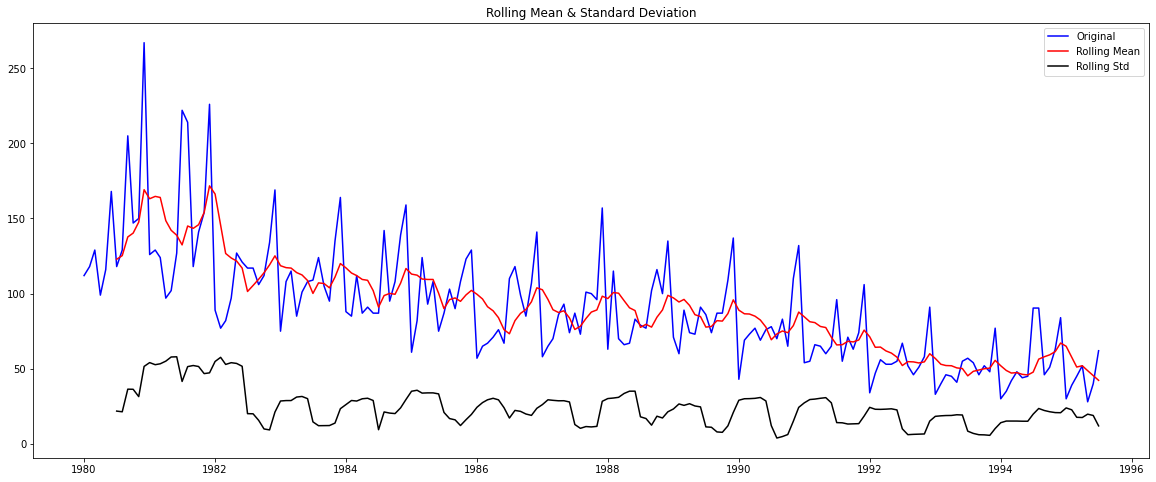

Results of Dickey-Fuller Test:
Test Statistic                  -1.933803
p-value                          0.316330
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [96]:
test_stationarity(df['Rose'])

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

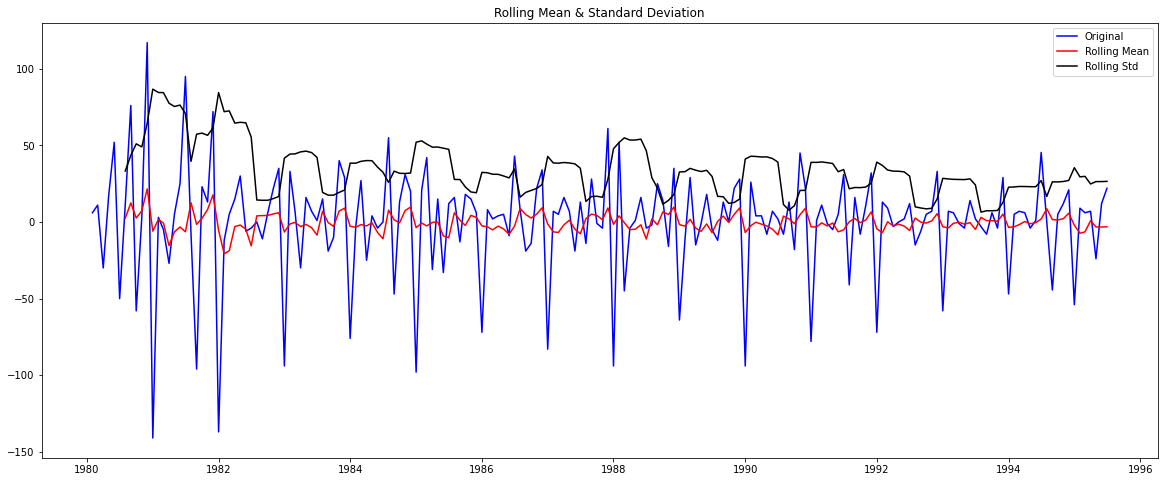

Results of Dickey-Fuller Test:
Test Statistic                -7.855944e+00
p-value                        5.442646e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [97]:
test_stationarity(df['Rose'].diff().dropna())

We see that at 𝛼 = 0.05 the Time Series is indeed stationary.

### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

#### ARIMA Model

In [549]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [550]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [551]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()#fitting the ARIMA model
    
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    #printing the parameters and the AIC
    
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748315
ARIMA(0, 1, 2) - AIC:1279.6715288535752
ARIMA(1, 1, 0) - AIC:1317.3503105381526
ARIMA(1, 1, 1) - AIC:1280.574229538006
ARIMA(1, 1, 2) - AIC:1279.870723423191
ARIMA(2, 1, 0) - AIC:1298.6110341604958
ARIMA(2, 1, 1) - AIC:1281.5078621868606
ARIMA(2, 1, 2) - AIC:1281.8707222264304


In [552]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
2,"(0, 1, 2)",1279.671529
5,"(1, 1, 2)",1279.870723
4,"(1, 1, 1)",1280.574230
7,"(2, 1, 1)",1281.507862
8,"(2, 1, 2)",1281.870722
1,"(0, 1, 1)",1282.309832
6,"(2, 1, 0)",1298.611034
3,"(1, 1, 0)",1317.350311
0,"(0, 1, 0)",1333.154673


In [553]:
auto_ARIMA = ARIMA(train, order=(0,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -636.836
Date:                Fri, 04 Mar 2022   AIC                           1279.672
Time:                        17:15:30   BIC                           1288.297
Sample:                    01-01-1980   HQIC                          1283.176
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6970      0.072     -9.689      0.000      -0.838      -0.556
ma.L2         -0.2042      0.073     -2.794      0.005      -0.347      -0.061
sigma2       965.8407     88.305     10.938      0.0

#### Predict on the Test Set using this model and evaluate the model.

In [554]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

#Importing mean squared error metrics
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
print(rmse)

36.44101531520602


In [555]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(0,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

,Test RMSE
RegressionOnTime,50.549673
NaiveModel,78.396083
SimpleAverageModel,52.318735
2pointTrailingMovingAverage,12.298291
4pointTrailingMovingAverage,15.845558
6pointTrailingMovingAverage,15.986163
9pointTrailingMovingAverage,16.500823
"Alpha=0.098,SimpleExponentialSmoothing",35.936195
"Alpha=1.5e-8,Beta=5.4e-9,DoubleExponentialSmoothing",16.980564
"Alpha=0.084,Beta=5.52e-6,Gamma=0.0005, Triple ExponentialSmoothing",15.534165


#### SARIMA Model

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

In [556]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

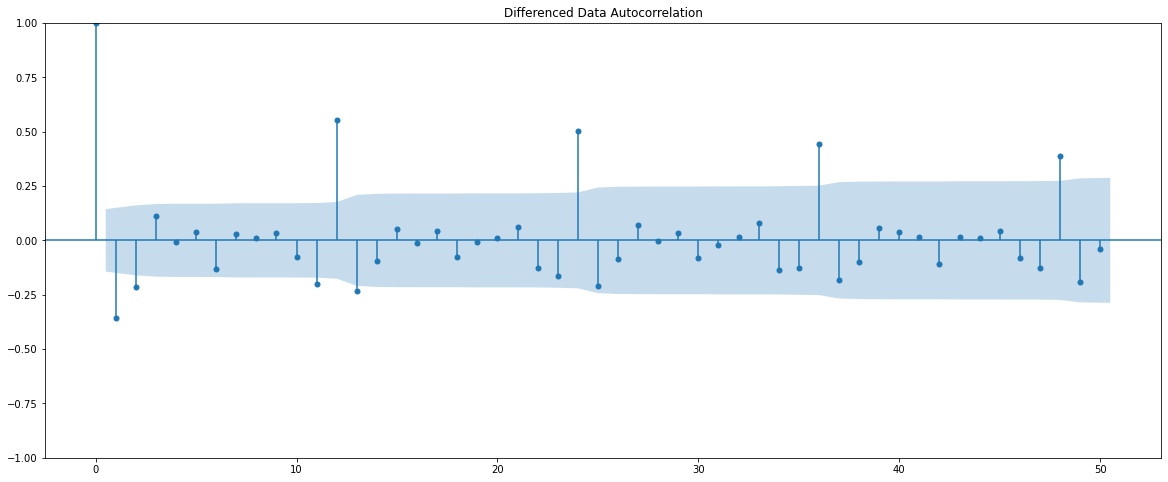

In [557]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 6 as well as 12. We will run our auto SARIMA models by setting seasonality both as 6 and 12.

#### Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [558]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [559]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [560]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1264.4996261113859
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1144.7077471827372
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1274.7897737087985
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1241.7870945149061
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1146.3093266722171
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1137.453362951538
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1117.022442577409
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1201.3832548029554
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1097.1908217752778
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1222.435473574505
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1160.4386253746843
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1084.8564124436346
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1095.7490379982628
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1097.6455189563455
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1053.004408261694
SARIMA(0, 1, 2)x(0, 0, 0, 6) - A

In [561]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
53,"(1, 1, 2)","(2, 0, 2, 6)",1041.655820
26,"(0, 1, 2)","(2, 0, 2, 6)",1043.600261
80,"(2, 1, 2)","(2, 0, 2, 6)",1045.220364
71,"(2, 1, 1)","(2, 0, 2, 6)",1051.673461
44,"(1, 1, 1)","(2, 0, 2, 6)",1052.778470


In [562]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -512.828
Date:                           Fri, 04 Mar 2022   AIC                           1041.656
Time:                                   17:16:26   BIC                           1063.685
Sample:                                        0   HQIC                          1050.598
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5940      0.152     -3.899      0.000      -0.893      -0.295
ma.L1         -0.1954    713.459     -0.000

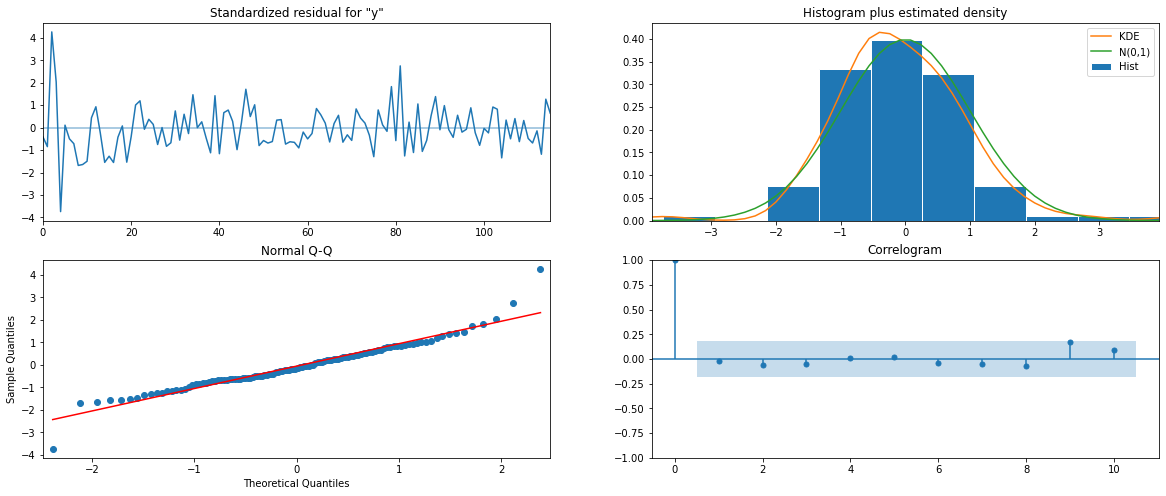

In [563]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots.

#### Predict on the Test Set using this model and evaluate the model.

In [564]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.841087,18.848390,25.898921,99.783253
1,67.631366,19.300158,29.803751,105.458981
2,74.748338,19.412719,36.700108,112.796568
3,71.327163,19.475666,33.155559,109.498767
4,76.019853,19.483949,37.832015,114.207690


In [565]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

25.333708257376205


In [566]:
resultsDf_10 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(2,0,2,6)'])
resultsDf = pd.concat([resultsDf, resultsDf_10])
resultsDf

,Test RMSE
RegressionOnTime,50.549673
NaiveModel,78.396083
SimpleAverageModel,52.318735
2pointTrailingMovingAverage,12.298291
4pointTrailingMovingAverage,15.845558
6pointTrailingMovingAverage,15.986163
9pointTrailingMovingAverage,16.500823
"Alpha=0.098,SimpleExponentialSmoothing",35.936195
"Alpha=1.5e-8,Beta=5.4e-9,DoubleExponentialSmoothing",16.980564
"Alpha=0.084,Beta=5.52e-6,Gamma=0.0005, Triple ExponentialSmoothing",15.534165


#### Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [567]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [568]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [569]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207277
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380898
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.020786938653
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635753624
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697583
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.573540894628
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918334
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383841
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.793632491807
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.743433094666
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483302176
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866535927
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461674
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988260339655
SARIMA(0, 1, 2)x(0, 0, 0,

In [570]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",887.937509
53,"(1, 1, 2)","(2, 0, 2, 12)",889.901052
80,"(2, 1, 2)","(2, 0, 2, 12)",890.668798
69,"(2, 1, 1)","(2, 0, 0, 12)",896.518161
78,"(2, 1, 2)","(2, 0, 0, 12)",897.346444


In [571]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Fri, 04 Mar 2022   AIC                            887.938
Time:                                    17:17:58   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.778     -0.004      0.996    -372.801     371.116
ma.L2         -0.1573     29.815   

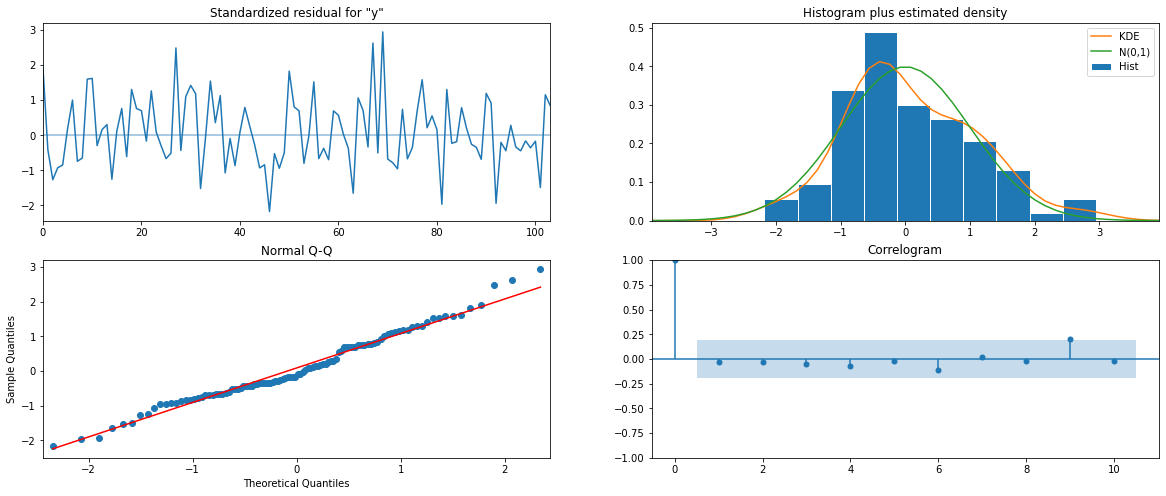

In [572]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

Similar to the last iteration of the model where the seasonality parameter was taken as 6, here also we see that the model diagnostics plot does not indicate any remaining information that we can get.

#### Predict on the Test Set using this model and evaluate the model.

In [573]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.867263,15.928501,31.647976,94.086551
1,70.541190,16.147659,38.892360,102.190019
2,77.356411,16.147656,45.707586,109.005235
3,76.208814,16.147656,44.559989,107.857638
4,72.747398,16.147656,41.098573,104.396222


In [574]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

26.41737381691886


In [575]:
resultsDf_10 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,12)'])
resultsDf = pd.concat([resultsDf, resultsDf_10])
resultsDf

,Test RMSE
RegressionOnTime,50.549673
NaiveModel,78.396083
SimpleAverageModel,52.318735
2pointTrailingMovingAverage,12.298291
4pointTrailingMovingAverage,15.845558
6pointTrailingMovingAverage,15.986163
9pointTrailingMovingAverage,16.500823
"Alpha=0.098,SimpleExponentialSmoothing",35.936195
"Alpha=1.5e-8,Beta=5.4e-9,DoubleExponentialSmoothing",16.980564
"Alpha=0.084,Beta=5.52e-6,Gamma=0.0005, Triple ExponentialSmoothing",15.534165


We see that the RMSE value hasn't reduced when the seasonality parameter was changed to 12.

### 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

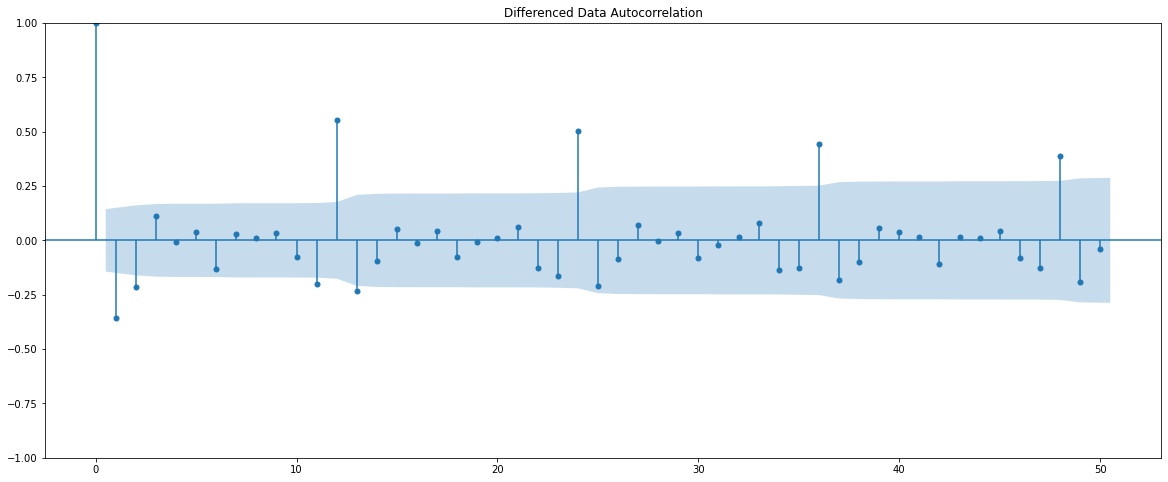

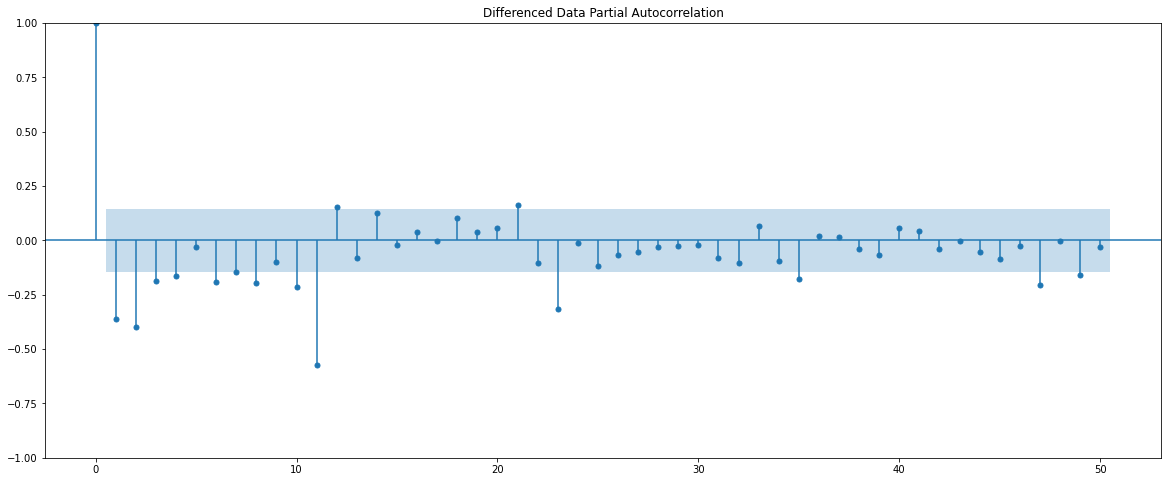

In [576]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.

The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.

By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 0.

#### Manual ARIMA

In [577]:
manual_ARIMA = ARIMA(train['Rose'].astype('float64'), order=(1,1,0))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -656.675
Date:                Fri, 04 Mar 2022   AIC                           1317.350
Time:                        17:18:02   BIC                           1323.101
Sample:                    01-01-1980   HQIC                          1319.687
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3555      0.067     -5.274      0.000      -0.488      -0.223
sigma2      1321.6677    125.729     10.512      0.000    1075.243    1568.092
Ljung-Box (L1) (Q):                   2.56   Jarque-

#### Predict on the Test Set using this model and evaluate the model.

In [578]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [579]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA,squared=False)
print(rmse)

72.74934920964563


In [580]:
resultsDf_11 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Manual ARIMA(1,1,0)'])
resultsDf = pd.concat([resultsDf, resultsDf_11])
resultsDf

,Test RMSE
RegressionOnTime,50.549673
NaiveModel,78.396083
SimpleAverageModel,52.318735
2pointTrailingMovingAverage,12.298291
4pointTrailingMovingAverage,15.845558
6pointTrailingMovingAverage,15.986163
9pointTrailingMovingAverage,16.500823
"Alpha=0.098,SimpleExponentialSmoothing",35.936195
"Alpha=1.5e-8,Beta=5.4e-9,DoubleExponentialSmoothing",16.980564
"Alpha=0.084,Beta=5.52e-6,Gamma=0.0005, Triple ExponentialSmoothing",15.534165


#### Manual SARIMA - Seasonality 6

In [581]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(0,1,0),
                                seasonal_order=(0, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                         SARIMAX Results                                         
Dep. Variable:                                      Rose   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(0, 0, [1, 2, 3], 6)   Log Likelihood                -536.636
Date:                                   Fri, 04 Mar 2022   AIC                           1081.271
Time:                                           17:18:02   BIC                           1092.145
Sample:                                       01-01-1980   HQIC                          1085.683
                                            - 12-01-1990                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L6       -0.1088      0.133     -0.818      0.413    

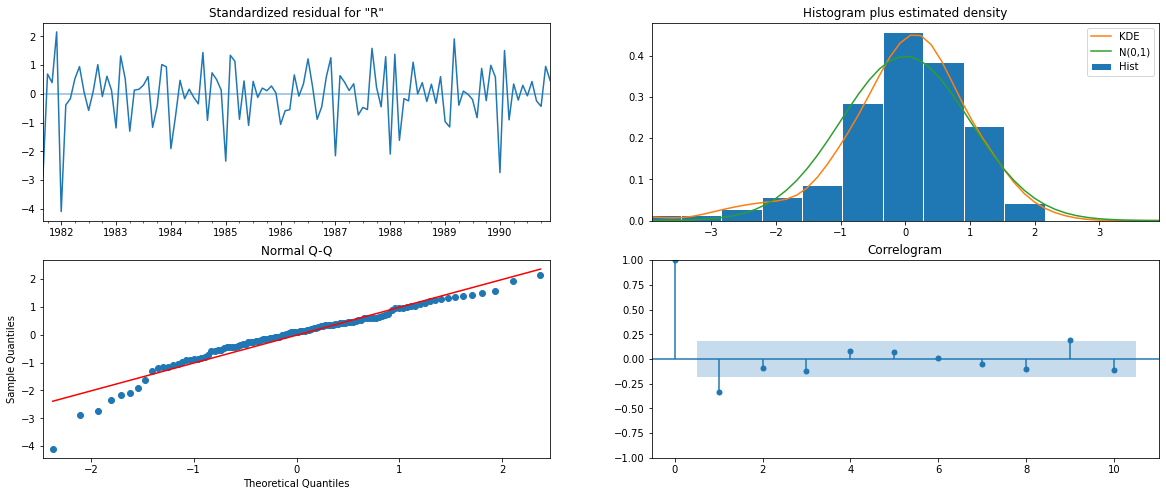

In [582]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [583]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-01,84.919625,28.471384,29.116737,140.722513
1991-02-01,108.600410,40.264353,29.683728,187.517092
1991-03-01,94.726518,49.313452,-1.926071,191.379108
1991-04-01,101.713683,56.942207,-9.890991,213.318358
1991-05-01,96.048214,63.663281,-28.729524,220.825951


In [584]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

62.45715321424444


In [585]:
resultsDf_12 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Manual SARIMA(0,1,0)(0,0,3,6)'])
resultsDf = pd.concat([resultsDf, resultsDf_12])
resultsDf

,Test RMSE
RegressionOnTime,50.549673
NaiveModel,78.396083
SimpleAverageModel,52.318735
2pointTrailingMovingAverage,12.298291
4pointTrailingMovingAverage,15.845558
6pointTrailingMovingAverage,15.986163
9pointTrailingMovingAverage,16.500823
"Alpha=0.098,SimpleExponentialSmoothing",35.936195
"Alpha=1.5e-8,Beta=5.4e-9,DoubleExponentialSmoothing",16.980564
"Alpha=0.084,Beta=5.52e-6,Gamma=0.0005, Triple ExponentialSmoothing",15.534165


#### Manual SARIMA - Seasonality 12

In [586]:
manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(0,1,0),
                                seasonal_order=(0, 0, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                         SARIMAX Results                                          
Dep. Variable:                                       Rose   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(0, 0, [1, 2, 3], 12)   Log Likelihood               -2251.354
Date:                                    Fri, 04 Mar 2022   AIC                           4510.708
Time:                                            17:18:07   BIC                           4520.881
Sample:                                        01-01-1980   HQIC                          4514.817
                                             - 12-01-1990                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12    2.262e+14         -0       -inf      0

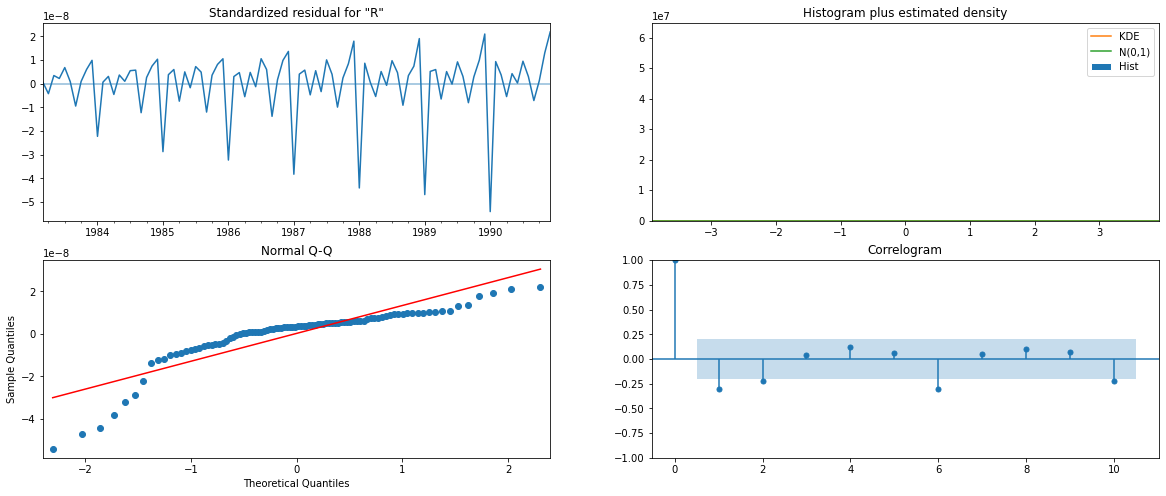

In [587]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [588]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-01,630.853592,1.005799e+10,-1.971330e+10,1.971330e+10
1991-02-01,558.546545,1.422415e+10,-2.787882e+10,2.787882e+10
1991-03-01,510.864669,1.742095e+10,-3.414444e+10,3.414444e+10
1991-04-01,569.483557,2.011598e+10,-3.942660e+10,3.942660e+10
1991-05-01,523.220492,2.249035e+10,-4.408028e+10,4.408028e+10


In [589]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

236.10460226623454


In [590]:
resultsDf_13 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Manual SARIMA(0,1,0)(0,0,3,12)'])
resultsDf1 = pd.concat([resultsDf, resultsDf_13])
resultsDf1

,Test RMSE
RegressionOnTime,50.549673
NaiveModel,78.396083
SimpleAverageModel,52.318735
2pointTrailingMovingAverage,12.298291
4pointTrailingMovingAverage,15.845558
6pointTrailingMovingAverage,15.986163
9pointTrailingMovingAverage,16.500823
"Alpha=0.098,SimpleExponentialSmoothing",35.936195
"Alpha=1.5e-8,Beta=5.4e-9,DoubleExponentialSmoothing",16.980564
"Alpha=0.084,Beta=5.52e-6,Gamma=0.0005, Triple ExponentialSmoothing",15.534165


### 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [591]:
resultsDf1

,Test RMSE
RegressionOnTime,50.549673
NaiveModel,78.396083
SimpleAverageModel,52.318735
2pointTrailingMovingAverage,12.298291
4pointTrailingMovingAverage,15.845558
6pointTrailingMovingAverage,15.986163
9pointTrailingMovingAverage,16.500823
"Alpha=0.098,SimpleExponentialSmoothing",35.936195
"Alpha=1.5e-8,Beta=5.4e-9,DoubleExponentialSmoothing",16.980564
"Alpha=0.084,Beta=5.52e-6,Gamma=0.0005, Triple ExponentialSmoothing",15.534165


### 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

Now, we will take our best model and forecast 12 months into the future with appropriate confidence intervals to see how the predictions look. We have to build our model on the full data for this.

TRIPLE EXPONENTIAL SMOOTHING model with additive seasonality is having the best RMSE of 15.534165, with Alpha=0.084, Beta=5.52, Gamma=0.0005

In [592]:
fullmodel1 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='additive').fit(smoothing_level=0.084,
                                                                 smoothing_trend=0.00000552,
                                                                 smoothing_seasonal=0.0005)

In [600]:
rmse = metrics.mean_squared_error(df['Rose'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',rmse)

RMSE: 18.003894689528405


In [601]:
resultsDf_14 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Full Model'])
resultsDf1 = pd.concat([resultsDf, resultsDf_14])
resultsDf1

,Test RMSE
RegressionOnTime,50.549673
NaiveModel,78.396083
SimpleAverageModel,52.318735
2pointTrailingMovingAverage,12.298291
4pointTrailingMovingAverage,15.845558
6pointTrailingMovingAverage,15.986163
9pointTrailingMovingAverage,16.500823
"Alpha=0.098,SimpleExponentialSmoothing",35.936195
"Alpha=1.5e-8,Beta=5.4e-9,DoubleExponentialSmoothing",16.980564
"Alpha=0.084,Beta=5.52e-6,Gamma=0.0005, Triple ExponentialSmoothing",15.534165


In [594]:
# Getting the predictions
prediction_1 = fullmodel1.forecast(steps=12)
prediction_1

1995-08-01     54.747132
1995-09-01     48.589636
1995-10-01     47.323865
1995-11-01     61.924788
1995-12-01    100.195492
1996-01-01     15.741491
1996-02-01     26.052301
1996-03-01     33.613156
1996-04-01     26.422582
1996-05-01     29.794524
1996-06-01     35.294206
1996-07-01     48.751955
Freq: MS, dtype: float64

<AxesSubplot:xlabel='YearMonth'>

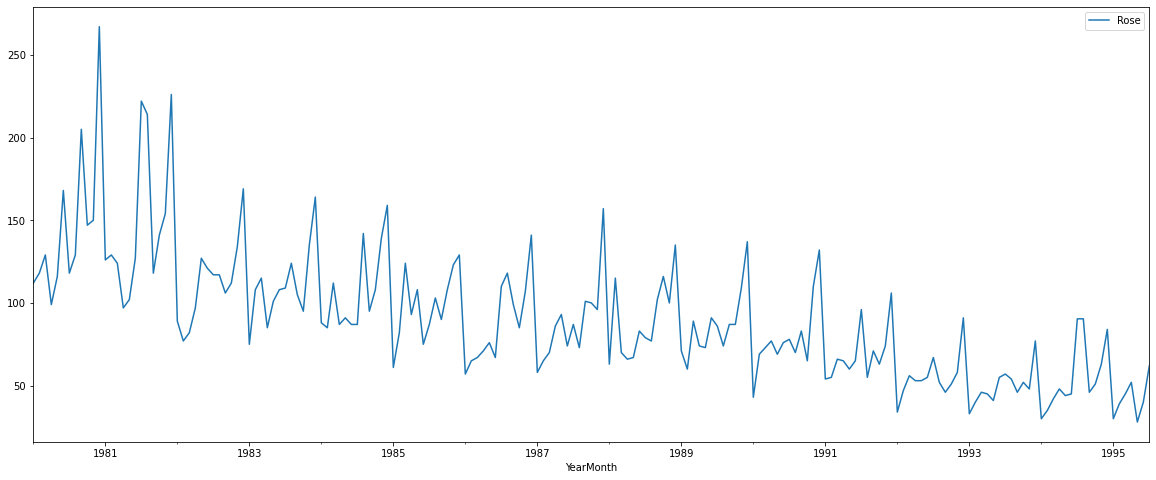

In [595]:
df.plot()

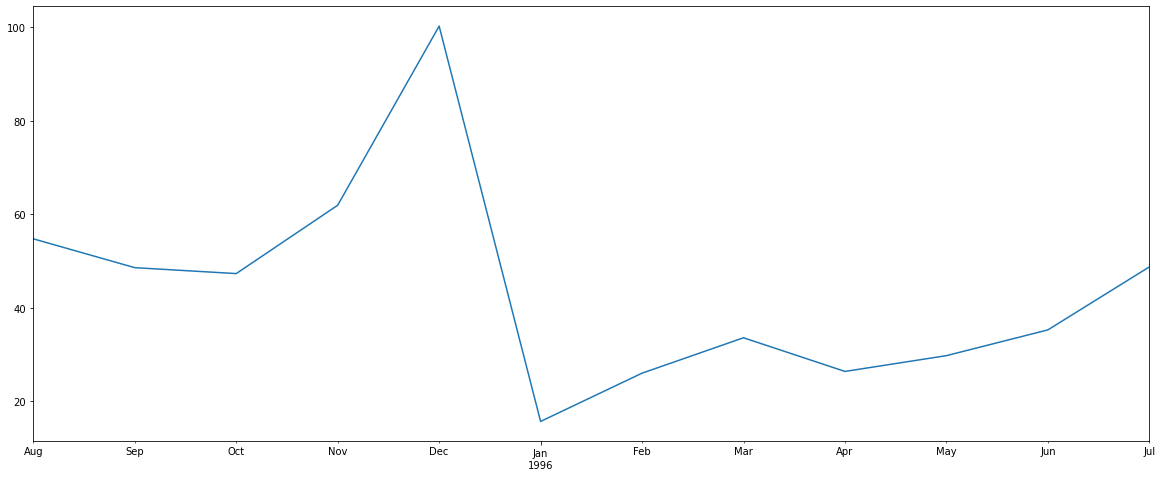

In [596]:
prediction_1.plot();

In [597]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

,lower_CI,prediction,upper_ci
1995-08-01,19.364766,54.747132,90.129497
1995-09-01,13.207271,48.589636,83.972002
1995-10-01,11.941499,47.323865,82.706231
1995-11-01,26.542422,61.924788,97.307153
1995-12-01,64.813126,100.195492,135.577858


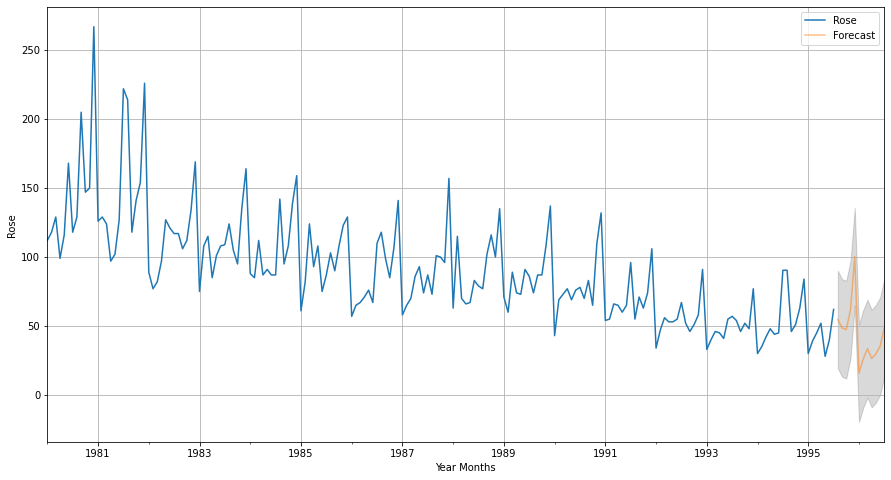

In [598]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.grid()
plt.show()

In [599]:
print(fullmodel1.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                     Rose   No. Observations:                  187
Model:             ExponentialSmoothing   SSE                          60614.222
Optimized:                         True   AIC                           1113.080
Trend:                         Additive   BIC                           1164.778
Seasonal:                      Additive   AICC                          1117.151
Seasonal Periods:                    12   Date:                 Fri, 04 Mar 2022
Box-Cox:                          False   Time:                         17:20:43
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0840000                alpha                False
smoothing_trend          

In [602]:
resultsDf_14

,Test RMSE
Full Model,18.003895


                                                        The End